In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_blobs

In [2]:
def perceptron(x: np.ndarray, y: np.ndarray, max_steps: int = 10_000):
    sample_size, num_dims = x.shape

    # Initialize the theta and theta_0 to zeros.
    th = np.zeros((num_dims,))
    th_0 = np.zeros((1,))

    for t in range(max_steps):
        has_error = False # Flag for convergence.

        for i in range(sample_size):
            if y[i] * (np.dot(x[i], th) + th_0) <= 0:
                th = th + (y[i] * x[i])
                th_0 = th_0 + y[i]

                has_error = True

        if not has_error: # Early stopping for convergence
            break

    if has_error: # Print whether the model converged or not.
        print(f"The Perceptron algorithm failed to converge.")
    else:
        print(f"The Perceptron algorithm converged in {t} steps.")

    return th, th_0

The Perceptron algorithm converged in 48 steps.


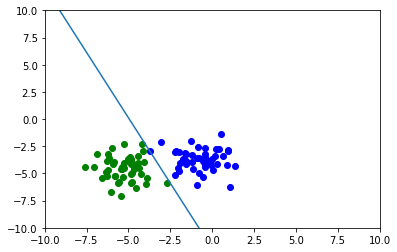

The Perceptron algorithm converged in 1 steps.


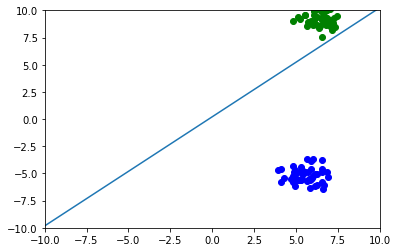

The Perceptron algorithm converged in 1 steps.


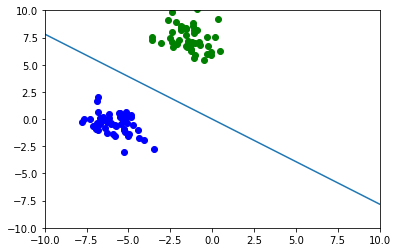

The Perceptron algorithm converged in 1 steps.


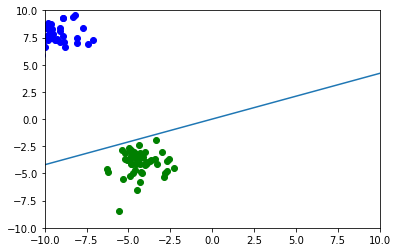

In [3]:
def test_perceptron(rs, std = 0.95, n_samples = 100): 
    # Hardest example I could find where it would not converge immediately.
    X, y = make_blobs(n_samples = n_samples, centers = 2, random_state = rs, cluster_std = std)

    # By default sklearn blobs are classified with the values of (0, 1) 
    # but we need (-1, 1) for the algorithm to work.
    y[y == 0] = -1

    th, th_0 = perceptron(X, y)

    # Green for +1 and Blue for -1
    for i in range(len(X)):
        if y[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], color = "green")
        else:
            plt.scatter(X[i, 0], X[i, 1], color = "blue")

    x_axis = np.linspace(-10, 10, 10)
    hyperplane = -(th[0] / th[1]) * x_axis - (th_0 / th[1])

    plt.plot(x_axis, hyperplane, "-")
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.show()
    
test_perceptron(rs = 35, std = 0.95)
test_perceptron(rs = 13, std = 0.75)
test_perceptron(rs = 22, std = 0.95)
test_perceptron(rs = 48, std = 0.95)

The Perceptron algorithm converged in 48 steps.
The Perceptron algorithm converged in 1 steps.
The Perceptron algorithm converged in 1 steps.
The Perceptron algorithm converged in 1 steps.


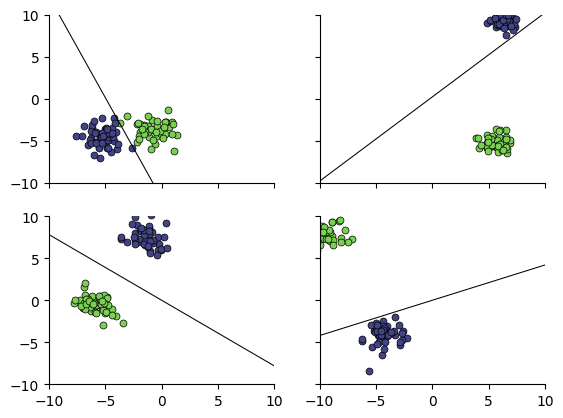

In [5]:
def plot_ax(ax, rs, std = 0.95, n_samples = 100): 
    # Hardest example I could find where it would not converge immediately.
    X, y = make_blobs(n_samples = n_samples, centers = 2, random_state = rs, cluster_std = std)

    # By default sklearn blobs are classified with the values of (0, 1) 
    # but we need (-1, 1) for the algorithm to work.
    y[y == 0] = -1

    th, th_0 = perceptron(X, y)

    # Green for +1 and Blue for -1
    cmap = plt.get_cmap("viridis")
    for i in range(len(X)):
        if y[i] == 1:
            ax.scatter(X[i, 0], X[i, 1], color = cmap(0.2), edgecolors = "black", linewidth = 0.5, s = 25)
        else:
            ax.scatter(X[i, 0], X[i, 1], color = cmap(0.8), edgecolors = "black", linewidth = 0.5, s = 25)

    x_axis = np.linspace(-10, 10, 10)
    hyperplane = -(th[0] / th[1]) * x_axis - (th_0 / th[1])

    ax.plot(x_axis, hyperplane, "-", color = "black", linewidth = 0.75)
    
    return ax
    

values = [
    [35, 0.95],
    [13, 0.75],
    [22, 0.95],
    [48, 0.95]
]
    
plt.style.use("default")
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i in range(4):
    plot_ax(axes[i], values[i][0], values[i][1])
    axes[i].set_xlim([-10, 10])
    axes[i].set_ylim([-10, 10])
    sns.despine(ax = axes[i])
    
    
axes[0].set_xticklabels([])
axes[1].set_xticklabels([])
axes[1].set_yticklabels([])
axes[-1].set_yticklabels([])

plt.savefig("./perceptron_example.png", dpi = 300, facecolor = "white", bbox_inches = "tight")
plt.show()